In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (GroupKFold,LeaveOneGroupOut,LeavePGroupsOut
                                    ,GridSearchCV,cross_validate)
from sklearn.datasets import load_breast_cancer

In [2]:
x_breast,y_breast=load_breast_cancer(return_X_y=True)
x=pd.DataFrame(x_breast)
y=pd.Series(y_breast).map({0:1,1:0})
#add patient arbitary for the demmo
patient_list=[p for p in range(10)]
np.random.seed(1)
x['patient']=np.random.choice(patient_list,size=len(x))

In [3]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,patient
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,5
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,8
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,9
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,5
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
#Number of the patiets
x['patient'].nunique()

10

<AxesSubplot:>

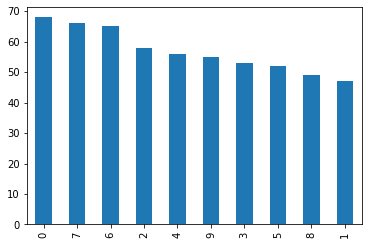

In [5]:
#Observation per patient
x['patient'].value_counts().plot.bar()

In [6]:
#split the dataset into train and test set
#this time we leave data from one patients out
#all patients except 7
x_train=x[x['patient']!=7]
y_train=y.iloc[x_train.index]

#patients with 7
x_test=x[x['patient']==7]
y_test=y.iloc[x_test.index]

# Group K-Fold cross validation

In [7]:
#Logiistics Regression
logit=LogisticRegression(penalty='l2',C=1,solver='liblinear',random_state=4,max_iter=10000)

#Group k fold crossvalidation
gkf=GroupKFold(n_splits=5)

clf=cross_validate(logit,x_train.drop('patient',axis=1),y_train,scoring='accuracy',return_train_score=True,cv=gkf.split(x_train.drop('patient',axis=1),y_train,groups=x_train['patient']))
clf['test_score']

array([0.94117647, 0.97321429, 0.93457944, 0.94444444, 0.9537037 ])

In [8]:
print("Mean train test accuracy:",np.mean(clf['train_score']),'+-',np.std(clf['train_score']))
print("Mean test set accuracy:",np.mean(clf['test_score']),'+-',np.std(clf['test_score']))

Mean train test accuracy: 0.959242394078576 +- 0.004959655170438507
Mean test set accuracy: 0.9494236687406012 +- 0.013397553928460522


In [9]:
logit.fit(x_train.drop('patient',axis=1),y_train)
train_pred=logit.predict(x_train.drop('patient',axis=1))
test_pred=logit.predict(x_test.drop('patient',axis=1))

In [10]:
print("Accuracy of the testing  score:",accuracy_score(y_test,test_pred))
print("Accuracy of the training score: ",accuracy_score(y_train,train_pred))

Accuracy of the testing  score: 0.9545454545454546
Accuracy of the training score:  0.9582504970178927


# Leave one out Group cross validation

In [11]:
#Logistice Regression
logit=LogisticRegression(penalty='l2',C=1,solver='liblinear',random_state=4,max_iter=10000)
#Leave one out cross validation
log=LeaveOneGroupOut()
clf=cross_validate(logit,x_train.drop('patient',axis=1),y_train,scoring='accuracy',return_train_score=True,cv=log.split(x_train.drop('patient',axis=1),y_train,groups=x_train['patient']))
clf['test_score']

array([0.94117647, 0.95744681, 0.9137931 , 0.94339623, 0.92857143,
       0.94230769, 0.98461538, 0.95918367, 0.96363636])

In [12]:
print("Mean train test accuracy:",np.mean(clf['train_score']),'+-',np.std(clf['train_score']))
print("Mean test set accuracy:",np.mean(clf['test_score']),'+-',np.std(clf['test_score']))

Mean train test accuracy: 0.9587403371341412 +- 0.003215545800143212
Mean test set accuracy: 0.9482363501736112 +- 0.019569633676638058


In [13]:
logit.fit(x_train.drop('patient',axis=1),y_train)
train_pred=logit.predict(x_train.drop('patient',axis=1))
test_pred=logit.predict(x_test.drop('patient',axis=1))

In [14]:
print("Accuracy of the training data:",accuracy_score(y_train,train_pred))
print("Accuracy of the testing data:",accuracy_score(y_test,test_pred))

Accuracy of the training data: 0.9582504970178927
Accuracy of the testing data: 0.9545454545454546


# Hyperparameter tunning

In [17]:
#Logistics Regression
logit=LogisticRegression(penalty='l2',C=1,solver='liblinear',random_state=4,max_iter=10000)
#Leave one group out crossvalidation
log=LeaveOneGroupOut()
#Hyperparameter space
param_grid=dict(
penalty=['l1','l2'],
C=[0.1,1,10])
#Search
clf=GridSearchCV(logit,param_grid=param_grid,scoring='accuracy',return_train_score=True,refit=True,cv=log.split(x_train.drop('patient',axis=1),y_train,groups=x_train['patient']))
search=clf.fit(x_train.drop('patient',axis=1),y_train)
print(search.best_params_)

{'C': 10, 'penalty': 'l1'}


In [19]:
results=pd.DataFrame(search.cv_results_)[['params','mean_test_score','std_test_score']]
print(results.shape)
results

(6, 3)


,params,mean_test_score,std_test_score
0,"{'C': 0.1, 'penalty': 'l1'}",0.926777,0.032700
1,"{'C': 0.1, 'penalty': 'l2'}",0.936519,0.029256
2,"{'C': 1, 'penalty': 'l1'}",0.954721,0.020197
3,"{'C': 1, 'penalty': 'l2'}",0.948236,0.019570
4,"{'C': 10, 'penalty': 'l1'}",0.966936,0.024317
5,"{'C': 10, 'penalty': 'l2'}",0.965339,0.023831


Text(0.5, 0, 'Hyperparameter Space')

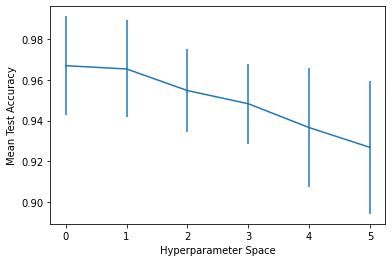

In [23]:
results.sort_values(by=['mean_test_score'],ascending=False,inplace=True)
results.reset_index(drop=True,inplace=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'],results['std_test_score']],subplots=True)
plt.ylabel("Mean Test Accuracy")
plt.xlabel('Hyperparameter Space')

In [24]:
#Lets get the prediction
train_pred=search.predict(x_train.drop('patient',axis=1))
test_pred=search.predict(x_test.drop('patient',axis=1))
                          

In [25]:
print("Accuracy of the training data:",accuracy_score(y_train,train_pred))
print("Accuracy of the testing data:",accuracy_score(y_test,test_pred))

Accuracy of the training data: 0.9860834990059643
Accuracy of the testing data: 0.9545454545454546
